In [236]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma
from scipy.stats import norm
from scipy.optimize import minimize
import scipy
from random import choices
import pandas as pd

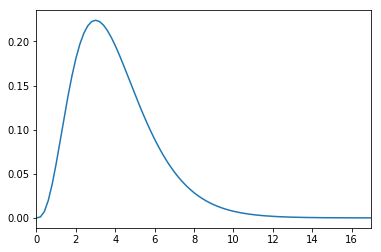

In [2]:
def prob_Gamma(alpha,beta,x):
    p = ((beta**alpha)/gamma(alpha))*x**(alpha-1)*np.exp(-beta*x)
    return p

x = np.linspace(0,100,num=500)

prob = prob_Gamma(4,1,x)

plt.plot(x,prob)
plt.xlim(0,17)
plt.show()

## Question 1

## Part A

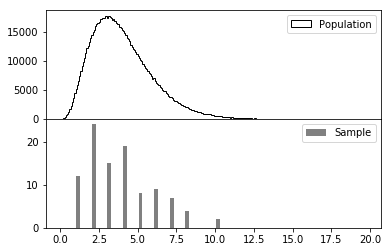

In [87]:
pop = np.random.gamma(4,1,1000000)
samp = np.random.gamma(4,1,100)
fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True)
ax[0].hist(pop,histtype='step',color='black',bins=250,label='Population')
ax[0].legend(loc='best')
ax[1].hist(samp,color='gray',rwidth=.25,label='Sample')
ax[1].legend(loc='best')
fig.subplots_adjust(hspace=0)
plt.savefig('plots/p1_a.png')
plt.show()

In [88]:
sampMean = np.mean(samp)
sampVar = np.var(samp)

analyMean = 4/1
analyVar = 4/1

print("Sample Mean and Var: %s, %s "%(sampMean,sampVar))
print("Analytic Mean and Var: %s, %s"%(analyMean,analyVar))


Sample Mean and Var: 3.9475988536713875, 4.253661645652892 
Analytic Mean and Var: 4.0, 4.0


## Part B

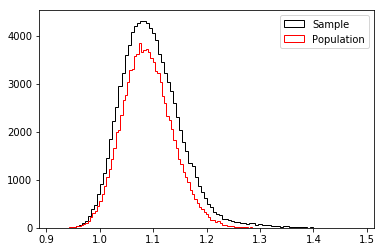

In [89]:
# Boot Strap

nboots = 100000
ndata = 90 
boot_vals = [] # boot strap stat
pop_vals = [] # invisible stat

for i in range(nboots):
    boot_samp = np.random.choice(samp,ndata)
    pop_samp = np.random.choice(pop,ndata)
    
    boot_vals.append(np.mean(boot_samp)/np.median(boot_samp))
    pop_vals.append(np.mean(pop_samp)/np.median(pop_samp))


boot_vals = np.array(boot_vals)   
pop_vals = np.array(pop_vals)
plt.hist(boot_vals,color='black',histtype='step',label='Sample',bins=100)
plt.hist(pop_vals,color='red',histtype='step',label='Population',bins=100)
plt.legend(loc='best')
plt.savefig('plots/p1_b.png')
plt.show()

In [90]:
pop_stat = np.sum(pop_vals)/nboots
boot_stat = np.sum(boot_vals)/nboots

boot_se = np.sqrt(np.sum((boot_vals-pop_stat)**2)/(nboots-1))


print("Boot Strap Statistic: ",boot_stat, "Standard Error: ",boot_se)
print("Invisible Population: ",pop_stat)

Boot Strap Statistic:  1.095621719390538 Standard Error:  0.056531742729084886
Invisible Population:  1.0893137144514933


In [91]:
# Calculation Mean and Std of both the Bootstrap and the Population
# statistic

boot_mean = np.mean(boot_vals)
boot_std = np.std(boot_vals)

pop_mean = np.mean(pop_vals)
pop_std = np.std(pop_vals)

print('Boot strap values: ','mean = ', boot_mean, 'std = ',boot_std)

Boot strap values:  mean =  1.095621719390538 std =  0.0561784215806841


## Problem 3

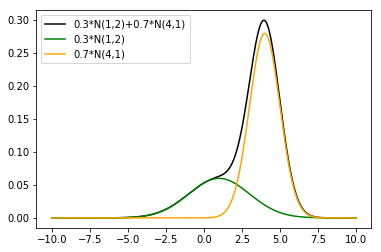

In [157]:
# Writing the distribution function
n1 = norm(loc=1,scale=2)
n2 = norm(loc=4,scale=1)

def dist(x):
    p = 0.3*n1.pdf(x)+0.7*n2.pdf(x)
    return p

# Creating distribution values
x = np.linspace(-10,10,num=10**6)
p = dist(x)
p1 = 0.3*n1.pdf(x)
p2 = 0.7*n2.pdf(x)

# Plotting the distribution for a sanity check
plt.plot(x,p,color='black',label='0.3*N(1,2)+0.7*N(4,1)')
plt.plot(x,p1,color='green',label='0.3*N(1,2)')
plt.plot(x,p2,color='orange',label='0.7*N(4,1)')
plt.legend(loc='best')
plt.savefig('plots/normal_plots.png')
plt.show()



# Mean is 3.1

array([1.61546401e-08, 1.61555286e-08, 1.61564172e-08, ...,
       2.40203109e-06, 2.40192269e-06, 2.40181428e-06])

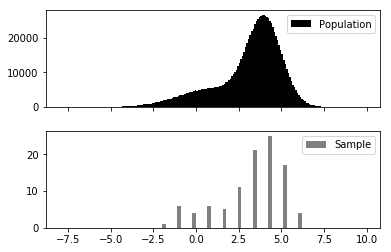

In [160]:
## Picks random values from the distribution 
# Creates both a population (invisible) values &
# a sample 
pop = choices(x,p,k=10**6)
samp = choices(x,p,k=100)

fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True)

# Histogram of the population and sample for sanity check
ax[0].hist(pop,color='black',bins=200,label="Population")
ax[0].legend(loc='best')
ax[1].hist(samp,color='gray',rwidth=0.25,label='Sample')
ax[1].legend(loc='best')
fig.subplots_adjust(hspace=.25)
plt.savefig('plots/p3_hist.png')
plt.show()


In [213]:
# Boot strap sample
nboots = 100
ndata = 90
boot_vals = []

for i in range(nboots):
    boot_samp = np.random.choice(samp,ndata)
    boot_vals.append(np.mean(boot_samp)/np.median(boot_samp))

boot_vals = np.array(boot_vals)   


Bootstrap value: 0.875047790023528 , Standard Error: 0.035967321557062136
Boot Strap Bias:  -0.008607241222072126


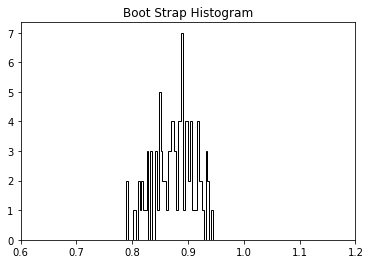

In [219]:
# Calculating the Bootstrap Expectation
boot = np.sum(boot_vals)/nboots

# Standard error
boot_se = np.sqrt(np.sum((boot_vals-boot)**2)/(nboots-1))
print('Bootstrap value:',boot,', Standard Error:',boot_se)

# Calculating the bias
theta = np.mean(samp)/np.median(samp)
boot_bias = boot - theta
print('Boot Strap Bias: ',boot_bias)

# Creating plots of the statistic 
plt.hist(boot_vals,color='black',histtype='step',label='Boot Strap',bins=50)
plt.title('Boot Strap Histogram')
plt.xlim(.6,1.2)
plt.show()

In [217]:
# Jack Knife
jk_val = []
for i in range(len(samp)):
    jk = np.delete(samp,i) # Deletes the ith index
    jk_val.append(np.mean(jk)/np.median(jk)) # calculates the statistic
jk_val = np.array(jk_val)


Jack knife:  0.8837095731747592 , Standard Error:  0.06254788282620691
Jack Knife Bias:  0.005399650986751103


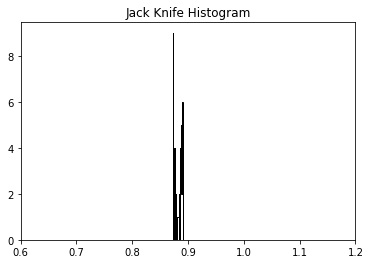

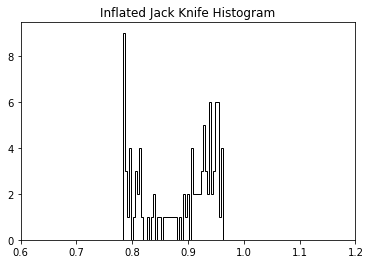

In [224]:
# Calculating the Standard error
theta_dot = np.mean(jk_val)
jk_se = np.sqrt((len(samp)-1)/len(samp)*np.sum(np.square(theta_dot-jk_val)))
print('Jack knife: ',theta_dot,', Standard Error: ',jk_se)

# Calculating the bias
theta = np.mean(samp)/np.median(samp)
jk_bias = (len(samp)-1)*(theta_dot-theta)
print('Jack Knife Bias: ',jk_bias)

# Plotting a histogram
plt.hist(jk_val,color='black',histtype='step',bins=50)
plt.xlim(.6,1.2)
plt.title('Jack Knife Histogram')
plt.show()

# Plotting inflated Jackknife 
inflated_jk = ((np.sqrt(len(samp)-1))*(jk_val-theta)+theta_dot)
plt.hist(inflated_jk,color='black',histtype='step',bins=50)
plt.title('Inflated Jack Knife Histogram')
plt.xlim(.6,1.2)
plt.show()

## Problem 4

In [235]:
dt = pd.read_table('data.txt',sep=' ')
x_dt = dt['x']
y_dt = dt['y']
err_dt = dt['err']

def model(x,b):
    y = b1*np.exp(-b2*x)+b3*np.exp(-0.5*(x-b4)**2/b5**2)
    return y

def chi_square(b,x,y,err):
        return np.sum(((model(x,b)-y)/err)**2)

In [232]:
# Boot strapping

ndata = 20 # picking a sub sample of 20 data points from the 23
nboots = 100

for i in range(nboots):
    samp = dt.sample(ndata)
    xx = samp['x']
    yy = samp['y']
    err = samp['err']
    chi_square(b,xx,yy,err)
    b0 = np.array([3,2,1.5,4,2])
    b_opt = minimize(chi_square,b0)

    
    


















['x', 'y', 'err']

In [234]:
dt.sample(15)

,x,y,err
11,3.4,0.896728,0.088835
0,0.1,1.955692,0.166896
17,5.2,1.147387,0.116683
15,4.6,1.043530,0.219187
16,4.9,0.956827,0.142469
19,5.8,0.698671,0.076323
21,6.4,0.576371,0.085922
20,6.1,0.553228,0.082132
2,0.7,1.022129,0.102145
10,3.1,1.087705,0.152064
